In [1]:
%matplotlib inline
import numpy as np
from pyquante2 import *
from pyquante2.scf.iterators import AveragingIterator
import matplotlib.pyplot as plt

Compute RHF on N2 molecule for interatomic
separation R in a range with N points.

In [9]:
N = 25
R_vec = np.linspace(0.5, 3.0, N)
E_vec = np.zeros((N,))
for k in range(N):
    R = R_vec[k]
    print "Solving for R = %g ..." % R
    n2 = molecule([(7,0,0,-R/2),(7,0,0,R/2)],units='Angstrom')
    bfs = basisset(n2,'sto3g')
    solver = rhf(n2,bfs)
    #ens = solver.converge()
    ens = solver.converge(AveragingIterator,maxiters=100)
    E_vec[k] = solver.energy
    print "%g\n" % solver.energy

Solving for R = 0.5 ...
-100.573

Solving for R = 0.604167 ...
-103.98

Solving for R = 0.708333 ...
-105.805

Solving for R = 0.8125 ...
-106.765

Solving for R = 0.916667 ...
-107.241

Solving for R = 1.02083 ...
-107.445

Solving for R = 1.125 ...
-106.805

Solving for R = 1.22917 ...
-106.902

Solving for R = 1.33333 ...
-106.945

Solving for R = 1.4375 ...
-106.959

Solving for R = 1.54167 ...
-106.957

Solving for R = 1.64583 ...
-106.947

Solving for R = 1.75 ...
-106.712

Solving for R = 1.85417 ...
-106.743

Solving for R = 1.95833 ...
-106.766

Solving for R = 2.0625 ...
-106.781

Solving for R = 2.16667 ...
-106.792

Solving for R = 2.27083 ...
-106.8

Solving for R = 2.375 ...
-106.805

Solving for R = 2.47917 ...
-106.808

Solving for R = 2.58333 ...
-106.809

Solving for R = 2.6875 ...
-106.81

Solving for R = 2.79167 ...
-106.81

Solving for R = 2.89583 ...
-106.809

Solving for R = 3 ...
-106.808



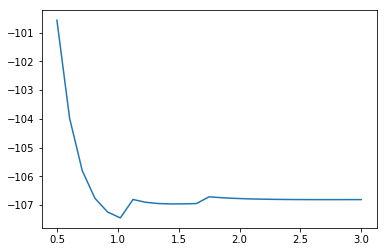

In [7]:
    
plt.figure()
plt.plot(R_vec, E_vec)
plt.show()

In [17]:
def n2_mol(R): return molecule([(7,0,0,-R/2),(7,0,0,R/2)],units='Angstrom')
def get_n2_energy(R,**kwargs): return get_energy(n2_mol(R),**kwargs)

def get_energy(geo,basis='sto3g',returnall=False):
    bfs = basisset(geo,basis)
    solver = rhf(geo,bfs)
    ens = solver.converge()
    if returnall: return ens
    return ens[-1]

In [18]:
Rs = [0.9,0.95,0.975,1.0,1.025,1.05,1.1]
Es = []
for R in Rs:
    n2 = molecule([(7,0,0,-R/2),(7,0,0,R/2)],units='Angstrom')
    bfs = basisset(n2,'sto3g')
    solver = rhf(n2,bfs)
    #ens = solver.converge(AveragingIterator,maxiters=100)
    ens = solver.converge()
    Es.append(solver.energy)
    print "%.3f %.3f" % (R,solver.energy)

0.900 -107.187
0.950 -107.329
0.975 -107.380
1.000 -107.420
1.025 -107.450
1.050 -106.680
1.100 -106.770


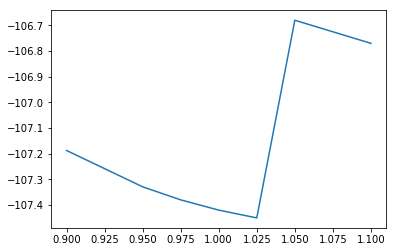

In [19]:
plt.plot(Rs,Es)

In [20]:
get_n2_energy(1.025,returnall=True)

[-103.69380801661737,
 -107.42054442138182,
 -107.44869965555364,
 -107.44991333373426,
 -107.44996793409052]

In [22]:
get_n2_energy(1.05,returnall=True)

[-103.84150710154371,
 -106.6555720985487,
 -106.67890976939941,
 -106.67968004223863,
 -106.67971298551639]

In [23]:
Enukes = [n2_mol(R).nuclear_repulsion() for R in Rs]

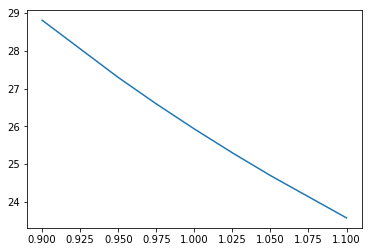

In [24]:
plt.plot(Rs,Enukes)

In [9]:
from pyquante2.scf.mcscf import gvb

----GVB calculation on N2 at R=0.900
**** PyQuante GVB ****
Stoichiometry = N2, Charge = 0, Multiplicity = 1
7 N     0.000000     0.000000    -0.850377
7 N     0.000000     0.000000     0.850377
Nuclear repulsion energy: 28.811
Basis set: sto3g
  ncore/open/pair: 7,0,0
  occ/bf/orb: 7,10,10
Shell 0
  occupation = 1.00
  orbitals in shell [0, 1, 2, 3, 4, 5, 6]
  couplings to other shells [(2.0, -1.0)]
Starting guess at orbitals:
[[ -7.0780e-01  -7.0841e-01   1.5671e-01   9.2773e-16   3.4306e-16
    1.5457e-01  -2.8848e-16   6.4803e-16   9.9153e-02  -8.2175e-02]
 [  4.6782e-03   2.6677e-03  -2.7894e-01  -1.2061e-14  -6.0772e-15
   -2.2505e+00   4.9578e-15  -8.2818e-15  -5.5206e-01  -4.3456e-01]
 [  7.2546e-20   1.1095e-16  -1.2815e-15   4.5318e-01  -3.8811e-01
    4.9231e-16   9.1216e-01  -8.7003e-02   2.2031e-15   7.8711e-16]
 [ -1.1062e-16   1.1062e-16   1.1764e-15  -3.8811e-01  -4.5318e-01
   -9.5030e-16   8.7003e-02   9.1216e-01   1.5582e-15   2.6686e-15]
 [ -5.0058e-03  -6.0813e-03 

**** PyQuante GVB ****
Stoichiometry = N2, Charge = 0, Multiplicity = 1
7 N     0.000000     0.000000    -0.944863
7 N     0.000000     0.000000     0.944863
Nuclear repulsion energy: 25.930
Basis set: sto3g
  ncore/open/pair: 7,0,0
  occ/bf/orb: 7,10,10
Shell 0
  occupation = 1.00
  orbitals in shell [0, 1, 2, 3, 4, 5, 6]
  couplings to other shells [(2.0, -1.0)]
Starting guess at orbitals:
[[ -7.0800e-01  -7.0844e-01   1.3979e-01   1.6904e-01   1.9015e-17
    1.1326e-15  -1.7358e-16  -3.2738e-16   1.0562e-01   8.4084e-02]
 [  4.5938e-03   6.2544e-03  -3.0109e-01  -1.7421e+00   3.3799e-16
   -1.0662e-14   1.9260e-15   2.2259e-15  -5.5107e-01   3.9815e-02]
 [  5.5314e-17  -8.3070e-17   3.5906e-16   7.6425e-16  -6.0639e-01
   -7.7910e-02  -7.4895e-01   4.4045e-01  -2.0889e-15   2.0307e-15]
 [ -1.1062e-16   1.1062e-16  -8.0195e-16  -4.9790e-15  -7.7910e-02
    6.0639e-01  -4.4045e-01  -7.4895e-01  -4.4863e-16  -7.8179e-16]
 [ -4.1067e-03  -2.6616e-03  -4.4526e-01  -1.1156e+00   1.5088e-1

****
ROTION Delta Matrix
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
---- 1 :   -103.8415    24.6949   -98.2473    67.9581
ROTION Delta Matrix
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
---- 2 :   -106.6556    24.6949   -97.2626    63.1747
ROTION Delta Matrix
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
---- 3 :   -106.6789    24.6949   -97.1272    62.8806
ROTION Delta Matrix
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0. 

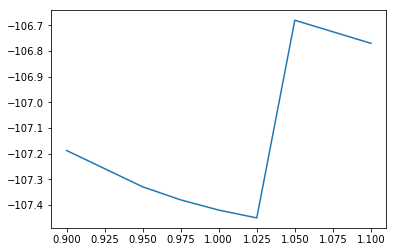

In [26]:
Egvbs = []
for R in Rs:
    n2 = n2_mol(R)
    print "----GVB calculation on N2 at R=%.3f" % R
    E = gvb(n2,verbose=True)
    Egvbs.append(E)
plt.plot(Rs,Egvbs)

In [38]:
# R     Etot        Enuke     Eone        Etwo
data = """\
0.900  -107.1872    28.8108  -100.3571    64.7162
0.950  -107.3287    27.2944   -99.2035    63.7838
0.975  -107.3796    26.5945   -98.6566    63.3390
1.000  -107.4195    25.9297   -98.1287    62.9081
1.025  -107.4500    25.2973   -97.6190    62.4907
1.050  -106.6797    24.6949   -97.0996    62.8246
1.100  -106.7696    23.5724   -96.1638    61.9856"""
Edata = []
for line in data.splitlines():
    Edata.append(map(float,line.split()))
Edata = np.array(Edata)

In [39]:
Edata

array([[   0.9   , -107.1872,   28.8108, -100.3571,   64.7162],
       [   0.95  , -107.3287,   27.2944,  -99.2035,   63.7838],
       [   0.975 , -107.3796,   26.5945,  -98.6566,   63.339 ],
       [   1.    , -107.4195,   25.9297,  -98.1287,   62.9081],
       [   1.025 , -107.45  ,   25.2973,  -97.619 ,   62.4907],
       [   1.05  , -106.6797,   24.6949,  -97.0996,   62.8246],
       [   1.1   , -106.7696,   23.5724,  -96.1638,   61.9856]])

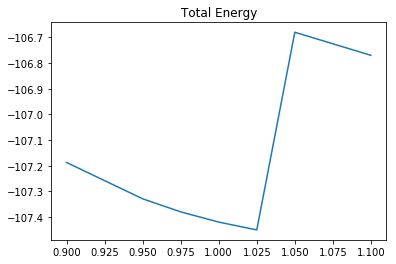

In [46]:
plt.plot(Edata[:,0],Edata[:,1])
plt.title("Total Energy")
plt.ylabel("E/h")
plt.xlabel("R")

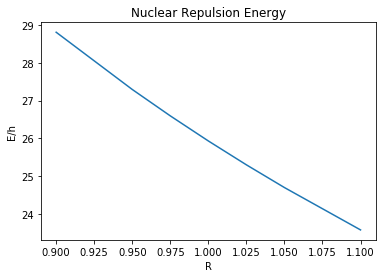

In [47]:
plt.plot(Edata[:,0],Edata[:,2])
plt.title("Nuclear Repulsion Energy")
plt.ylabel("E/h")
plt.xlabel("R")

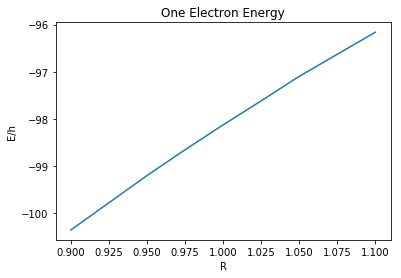

In [48]:
plt.plot(Edata[:,0],Edata[:,3])
plt.title("One Electron Energy")
plt.ylabel("E/h")
plt.xlabel("R")

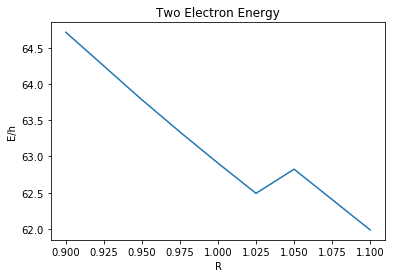

In [49]:
plt.plot(Edata[:,0],Edata[:,4])
plt.title("Two Electron Energy")
plt.ylabel("E/h")
plt.xlabel("R")